- # Import Useful Packages
- # Bring in key features / labels
- # Determine features
- # Create dictionary to hold model results

## Import Useful Packages

In [1]:
import pandas as pd
import numpy as np
import pickle
import sys

## Bring in key features / labels

In [2]:
##########################################################################################
#################### Pulling in the Lookup Table for Movies #############################
##########################################################################################
lookup_table_movies = pd.read_pickle('lookup_table_movies.pickle')

##########################################################################################
#################### Pulling in the User Ratings #########################################
##########################################################################################

# <<<<<<<Note pulling this in b/c it seems to make things too big... KMEANS doesn't end>>>>


#user_ratings = pd.read_pickle('user_ratings.pickle')

# This contains all the movieIDs for which we have already compiled metadata info available (i.e. from hetrec)
#movies_with_metadata = lookup_table_movies["movieID"].unique()  #10197 in length

# This takes all the user ratings from the ml-latest download, and pairs it down to only those movies 
# for which we have metadata information.
#user_ratings_for_movies_with_metadata = user_ratings[user_ratings["movieID"].isin(movies_with_metadata)] # 10196 in length

# This creates special lists that will be used to bias our training set towards users with a lot of ratings.
#users_ordered_by_frequency = list(user_ratings_for_movies_with_metadata[["userID","original_9"]].groupby("userID", as_index = False).count().sort('original_9', ascending=False)["userID"])
# These are the ID's of the 25000 most frequently rating users. 
#users_high_frequency_25000 = users_ordered_by_frequency[0:25000]  

#user_ratings_high_frequency = user_ratings_for_movies_with_metadata[user_ratings_for_movies_with_metadata["userID"].isin(users_w_most_ratings_25000)]
# These are the ID's of the other are the less frequently rating users
#users_low_frequency_remainder = users_ordered_by_frequency[25000:]
#user_ratings_low_frequency = user_ratings_for_movies_with_metadata[user_ratings_for_movies_with_metadata["userID"].isin(users_low_frequency_remainder)]

##########################################################################################
#################### Pulling in the Movie - X Feature Candidates #########################
##########################################################################################
imdb_and_rt_ratings_feature = pd.read_pickle('imdb_and_rt_ratings_feature.pickle') #<- ??Maybe I should consider dim. reducing these too?
misc_movie_features = pd.read_pickle('misc_movie_features.pickle')

#This is the full genre dummy feature... seems like perhaps I could test it whole since it's relatively small
genre_feature_dummied = pd.read_pickle('genre_feature_dummied.pickle')

#This is the svd shrunk features.
directors_feature_dim_reduced = pd.read_pickle('directors_feature_dim_reduced.pickle')
genre_feature_dim_reduced = pd.read_pickle('genre_feature_dim_reduced.pickle')
tags_feature_dim_reduced= pd.read_pickle('tags_feature_dim_reduced.pickle')
# actors_feature_dim_reduced = pd.read_pickle('actors_feature_dim_reduced.pickle')

In [46]:
imdb_and_rt_ratings_feature.head()

,movieID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore
0,1,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0
1,2,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0
2,3,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0
3,4,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0
4,5,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0


In [47]:
imdb_and_rt_ratings_feature_reduced = imdb_and_rt_ratings_feature[["movieID","rtAllCriticsScore","rtAudienceScore"]]

In [48]:
imdb_and_rt_ratings_feature_reduced.shape

(10197, 3)

## Create dictionary to hold model results

## (1) Create your "everything_matrix"
#### Bumps Memory usage from 2/3gb -> 11/12gb

In [49]:
# These steps may take a long time...

All_data = pd.merge(imdb_and_rt_ratings_feature_reduced,misc_movie_features, on = "movieID")
print "Merge 1 Complete"
print All_data.shape
All_data = pd.merge(All_data,directors_feature_dim_reduced, on = "movieID")
print "Merge 2 Complete"
print All_data.shape
All_data = pd.merge(All_data,genre_feature_dummied, on = "movieID")
print "Merge 3 Complete"
print All_data.shape
All_data = pd.merge(All_data,tags_feature_dim_reduced, on = "movieID")
print "Merge 4 Complete"
print All_data.shape
#All_data = pd.merge(All_data,actors_feature_dim_reduced, on = "movieID")
#print "Merge 5 Complete"

Merge 1 Complete
(10197, 4)
Merge 2 Complete
(10155, 14)
Merge 3 Complete
(10155, 34)
Merge 4 Complete
(7131, 44)


In [8]:
All_data.shape

(7131, 55)

##### [Delete some old variables to free up cache memory] i.e. list of features etc...

In [4]:
# This step is not necessairy if i'm not merging above with user data...

# #### Reduces Memory usage from 11/12gb -> 9.4gb
# this = sys.modules[__name__]
# list_of_vars_to_be_removed = ["user_ratings", "movies_with_metadata","user_ratings_for_movies_with_metadata", 
#                               "imdb_and_rt_ratings_feature","misc_movie_features",  "genre_feature_dummied",
#                               "directors_feature_dim_reduced",  "genre_feature_dim_reduced","tags_feature_dim_reduced",
#                               "actors_feature_dim_reduced", "lookup_table_movies","user_ratings_totals",
#                               "users_ordered_by_frequency","users_w_most_ratings_25000","user_ratings_totals_top75000",
#                               "user_ratings_for_movies_with_metadata_ratings_count","top25000","y_train",
#                               "Y_not_top25000", "user_ratings_user_ratings_for_movies_with_metadata_small","X_train"]

# # [v for v in globals().keys() if not v.startswith('_')] # <-- Seems to be the same as that
# #for i in vars().keys():  # <-- Seems to be the same as that
# for i in dir():    
#     if i[0] != "_":
#         if i in list_of_vars_to_be_removed:
#             print i
#             delattr(this,str(i))

# %reset out        

actors_feature_dim_reduced
directors_feature_dim_reduced
genre_feature_dim_reduced
genre_feature_dummied
imdb_and_rt_ratings_feature
lookup_table_movies
misc_movie_features
tags_feature_dim_reduced
Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (0 entries)


In [5]:
# Removing the extra y-ratings variables (besides original_9), 
# because they should essentially carry all the same information

In [6]:
# All_data.drop(["binned_5","binned_3","binary"], axis=1, inplace=True)

In [50]:
# Some minor data cleanup...dropping NA's 
All_data = All_data.dropna()    #Drops all rows with NA's

# Run MNF to Reduce the Number of Features from 57 to 3 
(s.t. we can visualize the clusters after doing kmenas)

In [10]:
All_data.shape

(7040, 55)

In [80]:
from sklearn.decomposition import NMF

In [81]:
mnf_model = NMF(n_components = 3)

# Here, this is the thing i'm waiting to finish!!!!

In [103]:
All_data_postNMF = mnf_model.fit_transform(All_data)  # <--- the abbreviated 3 features <--- # This will be the distilled matrix we plug our recomendations
All_data_postNMF_components = mnf_model.components_   # <--- the conversion matrix which should expand back to the full one
# print All_data.shape.shape          # (20519630, 57)
print All_data_postNMF.shape             # 
print All_data_postNMF_components.shape  # 

(7034, 3)
(3, 55)


In [29]:
# Not so necessairy if All_data doesn't include user data

# # Remove All_data to save space...
# this = sys.modules[__name__]
# list_of_vars_to_be_removed = ["All_data"]

# for i in dir():    
#     if i[0] != "_":
#         if i in list_of_vars_to_be_removed:
#             print i
#             delattr(this,str(i))

# %reset out

All_data
Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [13]:
# Pickle the ... b/c it takes far too long to run this thing...

#All_data_postNMF = pd.to_pickle("All_data_postNMF.pickle")
#All_data_postNMF_components = pd.to_pickle("All_data_postNMF_components.pickle")


In [14]:
# Loading from a pickle...
# All_data_postNMF = pd.read_pickle('All_data_postNMF.pickle')

In [51]:
All_data.columns

Index([u'movieID', u'rtAllCriticsScore', u'rtAudienceScore', u'year',
       u'director_nmf_vector_0', u'director_nmf_vector_1',
       u'director_nmf_vector_2', u'director_nmf_vector_3',
       u'director_nmf_vector_4', u'director_nmf_vector_5',
       u'director_nmf_vector_6', u'director_nmf_vector_7',
       u'director_nmf_vector_8', u'director_nmf_vector_9', u'genre_Action',
       u'genre_Adventure', u'genre_Animation', u'genre_Children',
       u'genre_Comedy', u'genre_Crime', u'genre_Documentary', u'genre_Drama',
       u'genre_Fantasy', u'genre_Film-Noir', u'genre_Horror', u'genre_IMAX',
       u'genre_Musical', u'genre_Mystery', u'genre_Romance', u'genre_Sci-Fi',
       u'genre_Short', u'genre_Thriller', u'genre_War', u'genre_Western',
       u'tags_nmf_vector_0', u'tags_nmf_vector_1', u'tags_nmf_vector_2',
       u'tags_nmf_vector_3', u'tags_nmf_vector_4', u'tags_nmf_vector_5',
       u'tags_nmf_vector_6', u'tags_nmf_vector_7', u'tags_nmf_vector_8',
       u'tags_nmf_vector_9

# Run KMeans on the reduced feature set


In [52]:
from sklearn.cluster import KMeans

In [53]:
def record_performance(num_of_clusters, kmeans_model_object):
    centroids_matrix = kmeans_model_object.cluster_centers_
    
    # Calculate the Inertia / variance for the elbow method.
    # The KMeans algorithm clusters data by trying to separate 
    # samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. 
    inertia_value = kmeans_model_object.inertia_
    
    # Calculate the gap for the gap Method
    # https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/
    # ?? tbd
    
    # Calculate the ... for the gaussian Method
    # http://stackoverflow.com/questions/1793532/how-do-i-determine-k-when-using-k-means-clustering
    # https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
    # http://stats.stackexchange.com/questions/23472/how-to-decide-on-the-correct-number-of-clusters
    # ?? tbd
    
    performance_tuple = (centroids_matrix, inertia_value)
    
    dict_of_kmeans_cost_per_k[num_of_clusters] = performance_tuple
    
    return inertia_value

In [54]:
dict_of_kmeans_cost_per_k = {}
# key = # number of clusters
# value = (cost, location of centroids, ....)

In [55]:
# Create range of clusters to iterate across:"
cluster_range = range(1,13)
inertia_list = []

# Iterate across the range of of potential cluster range

for k in cluster_range:
    kmeans_model_object = KMeans(n_clusters = k)
    print "K Means Model w/ ", k," clusters created."
    
    #kmeans_model_object.fit(All_data_postNMF)
    kmeans_model_object.fit(All_data)
    
    print "K Means Model w/ ", k," clusters created, fit to data."
    
    inertia_value = record_performance(k, kmeans_model_object)
    print "K means Centroid & Inertia Saved to dict_of_kmeans_cost_per_k."
    
    inertia_list.append(inertia_value)
    print "Inertia List Updated"

K Means Model w/  1  clusters created.
K Means Model w/  1  clusters created, fit to data.
K means Centroid & Inertia Saved to dict_of_kmeans_cost_per_k.
Inertia List Updated
K Means Model w/  2  clusters created.
K Means Model w/  2  clusters created, fit to data.
K means Centroid & Inertia Saved to dict_of_kmeans_cost_per_k.
Inertia List Updated
K Means Model w/  3  clusters created.
K Means Model w/  3  clusters created, fit to data.
K means Centroid & Inertia Saved to dict_of_kmeans_cost_per_k.
Inertia List Updated
K Means Model w/  4  clusters created.
K Means Model w/  4  clusters created, fit to data.
K means Centroid & Inertia Saved to dict_of_kmeans_cost_per_k.
Inertia List Updated
K Means Model w/  5  clusters created.
K Means Model w/  5  clusters created, fit to data.
K means Centroid & Inertia Saved to dict_of_kmeans_cost_per_k.
Inertia List Updated
K Means Model w/  6  clusters created.
K Means Model w/  6  clusters created, fit to data.
K means Centroid & Inertia Saved t

In [56]:
inertia_list

[2155146240700.5034,
 281207012799.1701,
 84301460713.800522,
 55418592190.115074,
 30180824044.587944,
 22483525786.602959,
 16573189723.225491,
 11636027617.139688,
 8823964522.6625519,
 7141805957.3460255,
 5813826539.182085,
 4867920713.5751514]

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

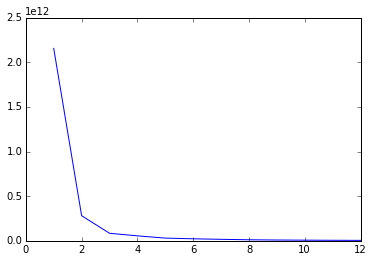

In [58]:
plt.plot(range(1,13),inertia_list)

In [79]:
k_clusters = 150

In [81]:
kmeans_model_object = KMeans(n_clusters = k_clusters)
print "K Means Model w/ ", k_clusters," clusters created."
    
#kmeans_model_object.fit(All_data_postNMF)
kmeans_model_object.fit(All_data)

K Means Model w/  150  clusters created.


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=150, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

## Find out which cluster each of the data points belongs to.

In [82]:
cluster_assignment = kmeans_model_object.predict(All_data)

(array([  26.,  116.,   42.,   29.,   52.,   78.,   32.,   10.,   15.,
           5.,   90.,   81.,   22.,   78.,   77.,   24.,   13.,    4.,
          22.,  108.,   27.,   16.,   14.,   19.,   16.,   88.,   45.,
          83.,   25.,  103.,   16.,   85.,   87.,    8.,   21.,   14.,
          65.,   76.,   18.,   97.,   16.,   23.,   21.,   57.,   99.,
          22.,   19.,   16.,   98.,   17.,    9.,   19.,   83.,   91.,
          10.,   72.,   90.,   24.,   90.,   16.,   89.,   22.,   22.,
          18.,   96.,   65.,   48.,   24.,   35.,   76.,   74.,   25.,
          19.,   27.,  132.,   82.,   60.,   14.,   11.,  101.,   44.,
          83.,   89.,   19.,   73.,   21.,  103.,   22.,   40.,   91.,
          74.,   77.,   80.,   16.,   96.,   12.,   13.,    5.,   22.,
          18.,   73.,   15.,   18.,   11.,   89.,   19.,   17.,   26.,
          84.,   13.,   87.,   82.,   20.,   42.,   20.,   13.,   84.,
          93.,   21.,   11.,   81.,    5.,   20.,   19.,   10.,   57.,
      

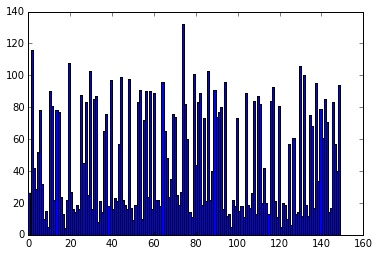

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(cluster_assignment,bins=k_clusters)

In [84]:
distances_from_all_centroid = kmeans_model_object.transform(All_data)
distance_from_closest_centroid_list = []

for i in range(distances_from_all_centroid.shape[0]):
    smallest_distance = distances_from_all_centroid[i].min() # Each row is a given observation, and it gives k (e.g. 30) distnaces from the point to each of the centroid centers
    distance_from_closest_centroid_list.append(smallest_distance)

## Create a table across all movies

In [85]:
movie_clusters_w_title = pd.DataFrame([All_data["movieID"], cluster_assignment]).T
movie_clusters_w_title = movie_clusters_w_title.rename(columns = {"Unnamed 0":"Centroid#"})
movie_clusters_w_title = pd.merge(movie_clusters_w_title, lookup_table_movies, on="movieID")

In [86]:
movie_clusters_w_title["Distance_to_Centroid"] = distance_from_closest_centroid_list

In [94]:
#? not sure if 4 is okay
movie_clusters_w_title[movie_clusters_w_title["Centroid#"] == 34].sort(columns = "Distance_to_Centroid").head(20)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,movieID,Centroid#,title,imdbID,rtID,Distance_to_Centroid
6859,59387.0,34.0,The Fall,460791,the-fall-2008,69.970565
6858,59369.0,34.0,Taken,936501,taken,76.052945
6871,59721.0,34.0,The Grand,427998,10009244-the_grand,80.002528
6857,59362.0,34.0,Anamorph,497323,anamorph,84.391926
6855,59333.0,34.0,Made of Honor,866439,made_of_honor,90.123522
6860,59421.0,34.0,What Happens in Vegas,1033643,10008760-what_happens_in_vegas,92.726837
6854,59313.0,34.0,Die weisse Massai,436889,die-weisse-massai-the-white-massai,93.722741
6852,59295.0,34.0,Expelled: No Intelligence Allowed,1091617,expelled_no_intelligence_allowed,95.346679
6856,59336.0,34.0,Redbelt,1012804,redbelt,100.731646
6861,59440.0,34.0,Bella,482463,bella,103.474705


In [44]:
 pd.options.display.max_columns = 5000

In [45]:
subset_of_movie_ids = [5816.0,2692.0]

All_data[All_data["movieID"].isin(subset_of_movie_ids)].head()

#movie_clusters_w_title[movie_clusters_w_title["Unnamed 0"] == 12 ].head(10)

,movieID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,year,director_nmf_vector_0,director_nmf_vector_1,director_nmf_vector_2,director_nmf_vector_3,director_nmf_vector_4,director_nmf_vector_5,director_nmf_vector_6,director_nmf_vector_7,director_nmf_vector_8,director_nmf_vector_9,genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Short,genre_Thriller,genre_War,genre_Western,tags_nmf_vector_0,tags_nmf_vector_1,tags_nmf_vector_2,tags_nmf_vector_3,tags_nmf_vector_4,tags_nmf_vector_5,tags_nmf_vector_6,tags_nmf_vector_7,tags_nmf_vector_8,tags_nmf_vector_9
1762,2692,7.7,78.0,72.0,6.0,92.0,7.5,20.0,19.0,1.0,95.0,3.8,33702.0,88.0,1998,0.000010,0.00001,0.000010,28.134755,3.840950,0.00001,69.329070,0.000010,17.673165,44.574312,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.200149,25.427175,28.832238,28.203452,23.671873,31.820233,28.669453,26.421250,25.212758,24.860105
3805,5816,7.1,199.0,164.0,35.0,82.0,6.6,39.0,27.0,12.0,69.0,3.6,176055.0,80.0,2002,30.281519,0.00001,62.722349,50.177272,0.000013,0.00001,8.065088,36.329022,0.000010,0.000010,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.950453,25.309132,27.453121,35.064055,24.183070,8.027742,27.389643,24.728297,30.263065,28.775903
